##Laboratorio 2
#---------------------------
- Alejandro Higuera
- Pablo Mancera
- Raúl Peña
- Omar Sarmiento
- Anderson Vargas

### Versión propia del algoritmo condensada en una función

El costo de nuestra versión propia del algoritmo es $O(G\times R \times P)$ o en complejidad simplificada $O(n^3)$ 

In [42]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt


#Denotemos T:Tamaño Genoma,P:Tamaño Poblacion, G:Número de generaciones, R:Rango de búsqueda

#Función para mutar un individuo, costo O(R)/O(n)
def mutar_individuo(individuo,tamano_gen,a,b):
    nuevo_individuo = 0 #O(1)
    individuo_no_es_valido = True #O(1)
    gen_a_mutar = random.randint(0,tamano_gen-1)
    while individuo_no_es_valido: #O(R) pues depende del rango si una mutación en un gen_a_mutar no es válida
      mutacion = random.randint(0,9) #O(1)
      nuevo_individuo = (individuo//10**(tamano_gen-gen_a_mutar))*10**(tamano_gen-gen_a_mutar) #O(1)
      nuevo_individuo += mutacion*(10**(tamano_gen-gen_a_mutar-1)) #O(1)
      nuevo_individuo += individuo%(10**(tamano_gen-gen_a_mutar-1)) #O(1)
      if a*(10**(tamano_gen-1))<=nuevo_individuo and b*(10**(tamano_gen-1))>=nuevo_individuo: #O(1)
        individuo_no_es_valido = False
    return nuevo_individuo

#Función para ejecutar la propia versión del algoritmo, costo O(G*R*P)//O(n^3)
def algo_genetico(tamano_gen,n_poblacion,prob_mut,n_generaciones,f,a,b):
    """
    Función para obtener el máximo global de la función f dada, mediante
    un álgoritmo genético con parámatros igual a los argumentos pasados.

    Parámetros
    ----------
    tamano_gen: int
      Tamaño del genoma
    n_poblacion: int
      Tamaño de la polación inicial
    prob_mut: float
      Probabilidad de mutación.
    n_generaciones: int
      Número de generaciones a simular
    f: function
      Función a optimizar
    a: float
      Limite inferior del rango de búsqueda.
    b: float
      Límite superior del rango de búsqueda
    """

    # Número de cifras enteras 
    n_cifras_enteras = max([len(list(str(abs(math.floor(a))))),len(list(str(abs(math.floor(b-0.00000001)))))]) #O(1)
    #Representaremos el genoma como enteros con # de cifras 10^tamano_gen esto por facilidad de cálculo
    #Generamos la población inicial 
    poblacion = [random.randrange(a*(10**(tamano_gen-1)),b*(10**(tamano_gen-1))) for i in range(n_poblacion)] #O(P)
    #La convertimos a numpy array para facilitar el cálculo numérico
    poblacion = np.array(poblacion) #O(P)

    #Numpy array para almacenar el error promedio de la población en función de su generación
    error_promedio = [] #O(1)
    #Numpy array para almacenar el mejor individuo por generación
    mejor_individuo = [] #O(1)

    #Versión vectorizada de f
    vf = np.vectorize(f) #O(1)

    #El búcle en total cuesta O(G)*O(R*P)=O(G*R*P)//O(n^3)
    for g in range(n_generaciones):
        tamano_poblacion = np.shape(poblacion)[0] #O(1)
        #Obtenemos el valor de f en cada uno de los individuos de la población
        valores_poblacion = vf(poblacion/(10**(tamano_gen-n_cifras_enteras))) #O(P)
        #Obtenemos el individuo con valor máximo en la población
        max_generacion = max(poblacion/(10**(tamano_gen-n_cifras_enteras)),key=f) #O(P)
        #Guardamos el mejor individuo
        mejor_individuo.append(max_generacion) #O(1)
        #Obtenemos el error promedio de la generación como sum(abs(Max-y_i))/n_individuos
        error_generacion = (1/tamano_poblacion)*sum(abs(f(max_generacion)-valores_poblacion)) #O(P)
        error_promedio.append(error_generacion) #O(1)

        #Evaluación de los individuos
        #Dividimos todo los valores de los inviduos entre la suma de la población
        #Para obtener una probabilidad entre 0 y 1 para evaluarlos
        fitness = valores_poblacion/sum(valores_poblacion) #O(1)

        #Offspring/Hijos de la nueva generacion
        offspring = [] #O(1)
        #Reproducción/Entrecruzamiento 
        #El búcle en total de la reproducción/entrecruzamiento cuesta O(P/2*)*O(1)=O(P)
        for k in range(tamano_poblacion//2):
          #Selección de los individuos que se reproduciran como un proceso aleatorio con la probabilidad dada por fitness
          padres = np.random.choice(tamano_poblacion, 2, p=fitness) #O(1)
          #Punto de cruce aleatorio
          punto_cruce = random.randint(0,tamano_gen-1) #O(1)
          #Asumiremos que cada padre tiene 2 hijos
          hijo_1 = str(poblacion[padres[0]]).zfill(tamano_gen)[:punto_cruce] + str(poblacion[padres[1]]).zfill(tamano_gen)[punto_cruce:] #O(1)
          hijo_2 = str(poblacion[padres[1]]).zfill(tamano_gen)[:punto_cruce] + str(poblacion[padres[0]]).zfill(tamano_gen)[punto_cruce:] #O(1)
          offspring.append(int(hijo_1)) #O(1)
          offspring.append(int(hijo_2)) #O(1)
        
        #Igualamos la población a la nueva generación de descendencia
        poblacion = np.array(offspring)

        #Mutación
        #Veremos cada individuo y su posiblidad de mutar como la realización de una Uniforme(0,1)
        individuo_prob = np.random.random(size=tamano_poblacion) #O(P)
        a_mutar = individuo_prob<prob_mut #O(P) por ser una operación vectorial
        #Usaremos a_mutar como una máscara booleana de quienes mutaremos
        individuos_a_mutar = np.arange(tamano_poblacion)[a_mutar] #O(P) por ser una op vectorial
        
        #Costo total del búcle O(R)*O(P)=O(R*P)/O(n^2)
        #Mutamos los individuos que fueron seleccionados para mutarse
        for j in individuos_a_mutar: 
          # Mutamos al individuo
          poblacion[j] = mutar_individuo(poblacion[j],tamano_gen,a,b) #O(R)
    
    #Retornamos una aproximación del máximo global O(1)
    print(f"El máximo local se tomma en aproximadamente x={mejor_individuo[-1]} y={f(mejor_individuo[-1])}")

    #Parámetros para mejorar la graficación
    plt.rcParams.update({'font.size': 12})
    plt.rcParams["figure.figsize"] = (10.5,6)

    #Graficamos el error promedio
    plt.title("Error promedio en función de la generación")
    plt.xlabel("Error promedio")
    plt.ylabel("Generación")
    plt.plot(range(1,n_generaciones+1),error_promedio,color="red")
    plt.show()

    #Graficamos los mejores individuo
    plt.title("Valor del mejor individuo")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    mejor_individuo = np.array(mejor_individuo)
    eje_x = np.arange(a,b,(b-a)/10**3)
    eje_y = vf(eje_x)
    plt.plot(eje_x,eje_y)
    individuos_x = mejor_individuo
    individuos_y = [f(x) for x in individuos_x]
    plt.scatter(individuos_x,individuos_y,color="red")
    plt.show()

###**Función 1** (Dada por el Profesor): $-(0.1+(1-x)^2-0.1\cdot cos(6\pi\cdot(1-x))+2$

El máximo local se tomma en aproximadamente x=0.97410016655713 y=1.9876470373339623


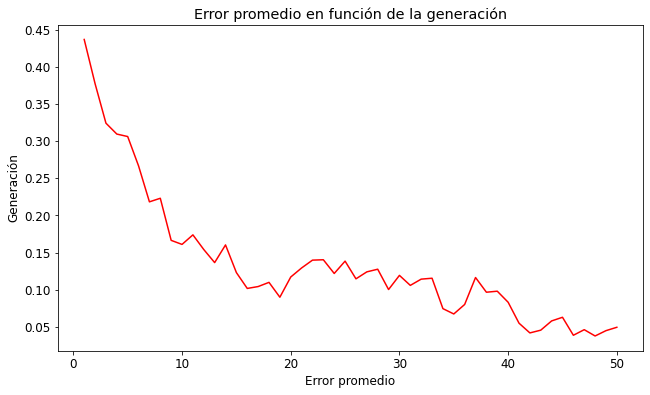

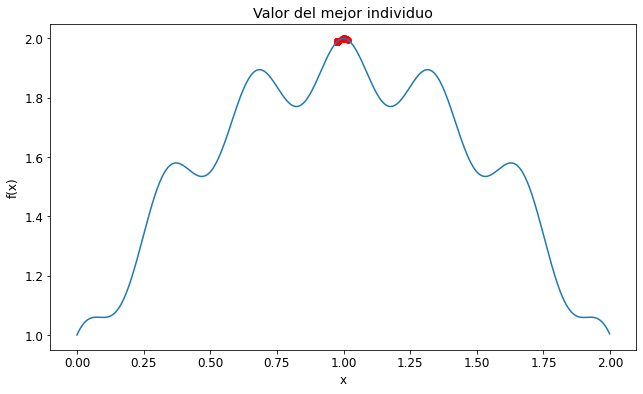

In [43]:
f = lambda x: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
algo_genetico(15,100,0.05,50,f,0,2)

### **Función 2:** $sen(3x)+cos(5x)+4$

El máximo local se tomma en aproximadamente x=2.5707765905404494 y=5.948936401463434


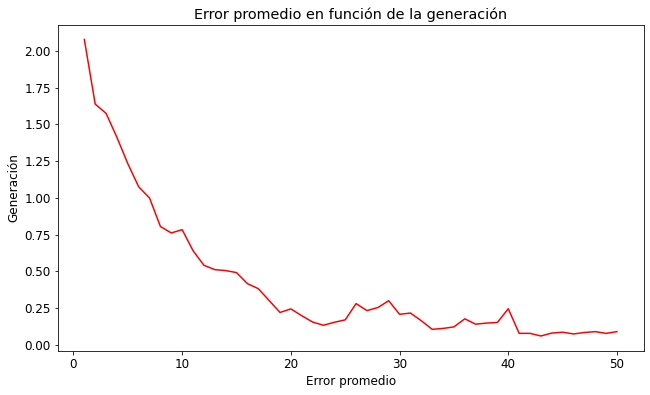

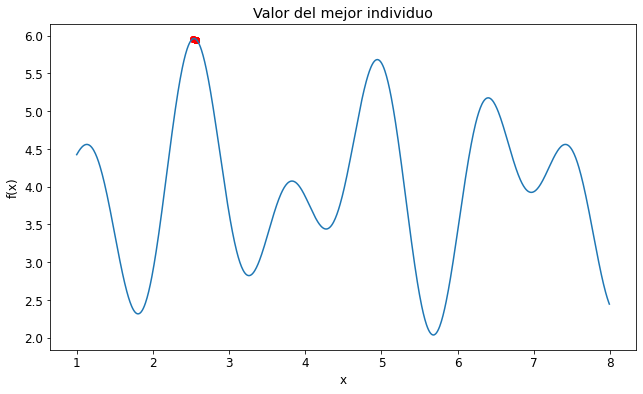

In [44]:
g = lambda x:  math.sin(3*x)+math.cos(5*x)+4
algo_genetico(200,50,0.01,50,g,1,8)

**Función 3:** $|senx|+\frac{x}{\pi}$

El máximo local se tomma en aproximadamente x=8.143766686 y=3.5505467651551212


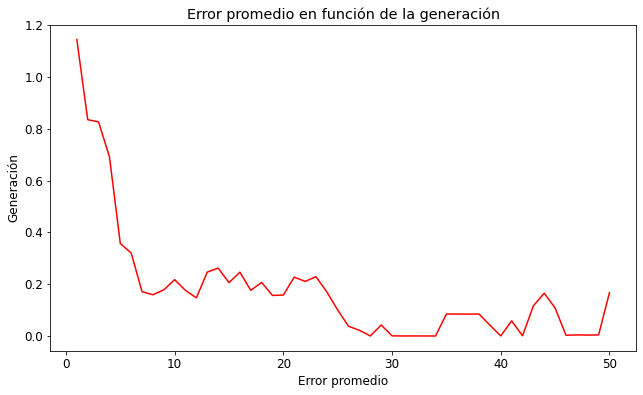

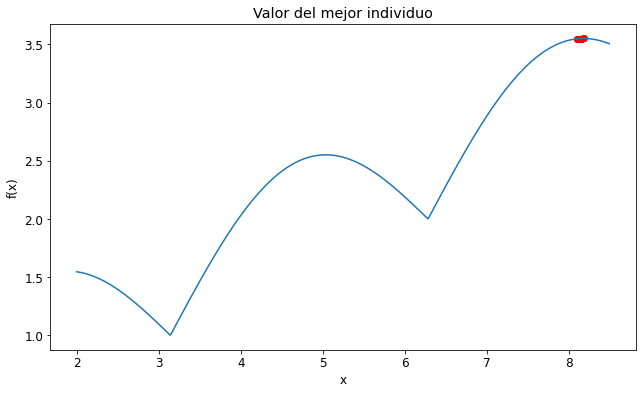

In [45]:
h = lambda x: abs(math.sin(x))+(x/math.pi)
algo_genetico(10,25,0.1,50,h,2,8.5)

**Función 4:** $sen(x^2) cos(x)+2$

El máximo local se tomma en aproximadamente x=5.739769530244 y=2.8552009658750994


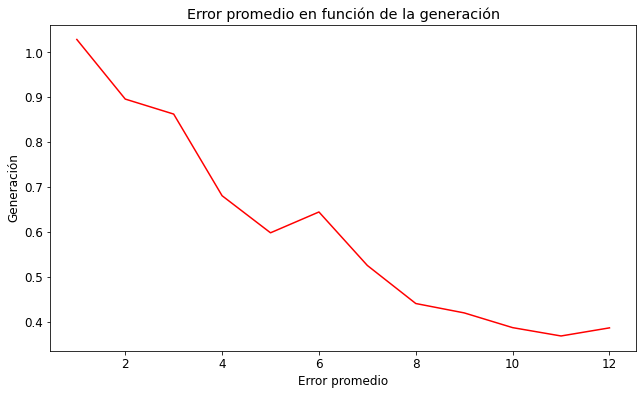

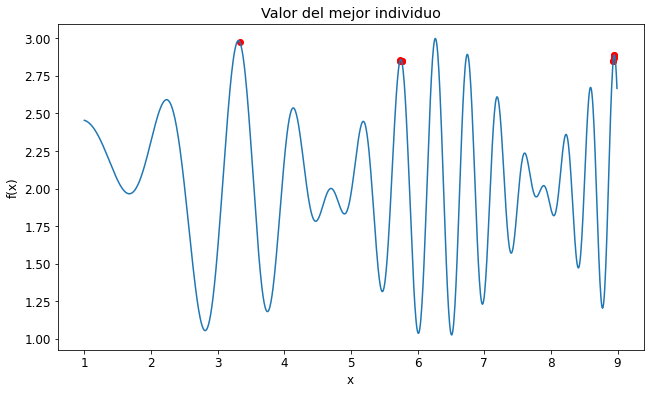

In [46]:
k = lambda x: math.sin(x**2)*math.cos(x)+2
algo_genetico(13,56,0.2,12,k,1,9)

**Función 5:** $2.34\cdot x+56$

El máximo local se tomma en aproximadamente x=4.998018783232671 y=11.695363952764449


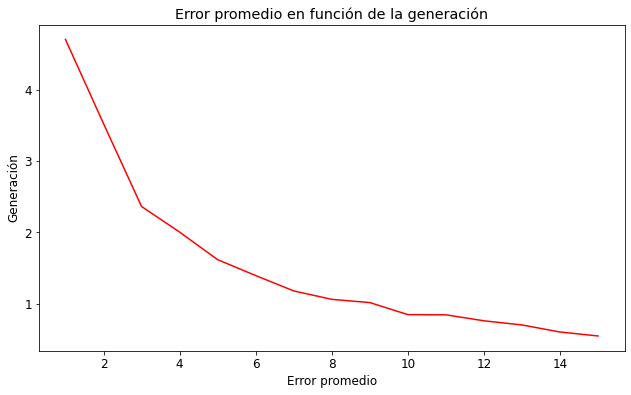

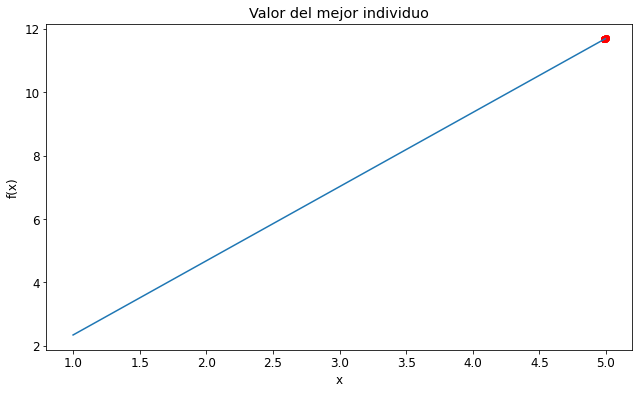

In [47]:
l = lambda x: 2.34*x
algo_genetico(24,200,0.01,15,l,1,5)

### Respuestas a algunas preguntas

5. **Cómo reacciona su algoritmo a variadas funciones de optimización (lineal, oscilantes(varias frecuencias), etc)?**

Contra funciones lineales o que solo tienen un maximo global, tiende a aglutinarse cerca de este maximo,
mas algunos valores se alejan, probablemente mutaciones.
Con funciones oscilantes, generalmente solo se acerca al optimo global. De vez en cuando algunas 
mutaciones lo alejan y le permiten encontrar algunos optimos globales.



**6. Concluya y Describa, por sus experimentos como están relacionados los parámetros de configuración de su algoritmo, con el costo en (tiempo y espacio).**

Los parametros más importantes son el tamaño del gen, el tamaño de la poblacion y el numero de generaciones:
Estos parametros estan directamente relacionados con la cantidad de memora que se requerira tener en cuenta
en todo momento (tamaño del gen y tamaño de la poblacion) al afectar el espacio requerido por individuo.

Los parametros tamaño de la poblacion y numero de generaciones afectan principalmente el tiempo al ser
los que dictan que tantos intentos de mutacion se realizan, que tantos emparejamientos se realizan y 
que tantas veces todos estos procedimientos realizaran a traves de las distintas generaciones.



7. **¿Qué parámetro considera usted más relevante para acelerar la convergencia de la búsqueda?**

El tamaño del genoma y la cantidad de generaciones tienen un gran impacto en el tiempo que la funcion ejecuta; sin
embargo, el parametro más importante a la hora de obtener la convergencia es definitivamente la probabilidad de 
mutacion, ya que puede alterar el espacio de busqueda y provocar una divergencia si es muy alta o nunca dar con
el punto buscado si es muy baja